# Clasificaciones usando muestra de tamaño 2500

In [1]:
import pickle

import numpy as np

import pandas as pd

% matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from libs.container import Container
from libs.display import d
from libs.experiment import KFoldExperiment, WithAnotherExperiment, roc, metrics
from libs.nearest import nearest
from libs.precstar import  prec_star

In [2]:
import joblib
cpu = joblib.cpu_count()

In [28]:
sample = pd.read_pickle("data/ogle3_only/scaled/s2_5k.pkl.bz2")
sample["tile"] = sample["id"].apply(lambda i: "b" + str(i)[1:4])
sample["cls"] = sample.vs_type.apply(lambda x: 0 if x == "" else 1)

no_features = ["id", "vs_catalog", "vs_type", "ra_k", "dec_k", "tile", "cls"] 
X_columns = [c for c in sample.columns if c not in no_features]

grouped = sample.groupby("tile")
data = Container({k: grouped.get_group(k).copy() for k in grouped.groups.keys()})


del grouped, sample
data

<Container({'b262': 2791, 'b263': 2805, 'b261': 2718, 'b278': 2912, 'b264': 2792})>

## Features

In [29]:
cls = {0:0, 1:1}

In [30]:
d(X_columns)

1. cnt
2. Amplitude
3. Autocor_length
4. Beyond1Std
5. CAR_mean
6. CAR_sigma
7. CAR_tau
8. Con
9. Eta_e
10. FluxPercentileRatioMid20
11. FluxPercentileRatioMid35
12. FluxPercentileRatioMid50
13. FluxPercentileRatioMid65
14. FluxPercentileRatioMid80
15. Freq1_harmonics_amplitude_0
16. Freq1_harmonics_amplitude_1
17. Freq1_harmonics_amplitude_2
18. Freq1_harmonics_amplitude_3
19. Freq1_harmonics_rel_phase_0
20. Freq1_harmonics_rel_phase_1
21. Freq1_harmonics_rel_phase_2
22. Freq1_harmonics_rel_phase_3
23. LinearTrend
24. MaxSlope
25. Mean
26. Meanvariance
27. MedianAbsDev
28. MedianBRP
29. PairSlopeTrend
30. PercentAmplitude
31. PercentDifferenceFluxPercentile
32. PeriodLS
33. Period_fit
34. Psi_CS
35. Psi_eta
36. Q31
37. Rcs
38. Skew
39. SmallKurtosis
40. Std
41. c89_jk_color
42. c89_hk_color
43. c89_jh_color
44. n09_jk_color
45. n09_hk_color
46. n09_jh_color
47. c89_m2
48. c89_m4
49. c89_c3
50. n09_m2
51. n09_m4
52. n09_c3
53. AmplitudeH
54. AmplitudeJ
55. ppmb
56. AmplitudeJH
57. AmplitudeJK

b278 (TRAIN) Vs. b261 (TEST)
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2497
           1       0.95      0.89      0.92       221

   micro avg       0.99      0.99      0.99      2718
   macro avg       0.97      0.94      0.95      2718
weighted avg       0.99      0.99      0.99      2718

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b262 (TEST)
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2495
           1       0.98      0.85      0.91       296

   micro avg       0.98      0.98      0.98      2791
   macro avg       0.98      0.92      0.95      2791
weighted avg       0.98      0.98      0.98      2791

--------------------------------------------------------------------------------
b278 (TRAIN) Vs. b263 (TEST)
              precision    recall  f1-score   support

           0       0.98      1.00      0.9

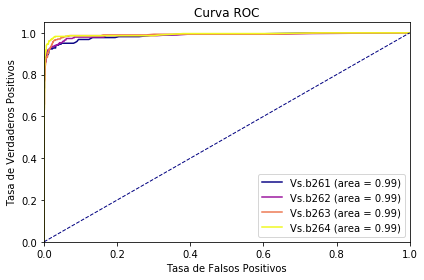

In [31]:
%%time 
rf = WithAnotherExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy", n_jobs=cpu), 
    clsnum=cls, data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
result = rf("b278")
roc(result)

In [7]:
result = result[0]

In [8]:
result.keys()

['y_test_real',
 'probabilities',
 'test_name',
 'predictions',
 'ids',
 'thresh',
 'tpr',
 'train_name',
 'fpr',
 'test_size',
 'prec_rec_curve',
 'confusion_matrix',
 'y_test',
 'roc_auc']

In [9]:
precision, recall, curve = result.prec_rec_curve

In [10]:
precision.shape

(238,)

In [11]:
# df.plot()
# plt.axhline(0.5)

In [12]:
%%time
rf = KFoldExperiment(
    clf=RandomForestClassifier(n_estimators=500, criterion="entropy", n_jobs=cpu), clsnum=cls, 
    data=data, pcls=1, ncls=0, X_columns=X_columns, y_column="cls")
rf = rf("b278", nfolds=10)

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2489
         1.0       0.94      0.85      0.89       423

   micro avg       0.97      0.97      0.97      2912
   macro avg       0.96      0.92      0.94      2912
weighted avg       0.97      0.97      0.97      2912

--------------------------------------------------------------------------------
CPU times: user 2min 51s, sys: 9.89 s, total: 3min 1s
Wall time: 36.8 s


In [13]:
from libs.precstar import *

In [16]:
ps = prec_star(rf.y_test, rf.probabilities[:,1], ss, rs)

In [15]:
ss = len(data.b278)
rs = 781612

In [ ]:
np.max(ps[:300])

In [18]:
df = pd.DataFrame({"ps": result, "p": rf.prec_rec_curve[0], "r": rf.prec_rec_curve[1]})

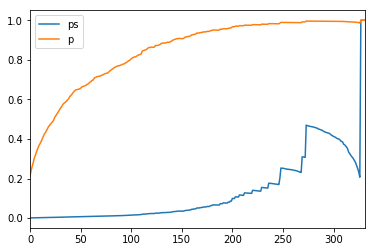

In [20]:
df[["ps", "p"]].plot()

In [ ]:
197/(12+197.)

In [22]:
SIZES = {
    'b220': 211850,
    'b234': 297302,
    'b247': 414497,
    'b248': 426369,
    'b261': 575075,
    'b262': 591770,
    'b263': 585661,
    'b264': 614967,
    'b277': 753146,
    'b278': 781612,
    'b396': 494646}

[ 0.10533842  0.12888108  0.15130674  0.16949153  0.18318068  0.19981752
  0.21428571  0.2257732   0.23542117  0.25057737  0.26334951  0.27784891
  0.28894807  0.29848693  0.30813124  0.31811487  0.33333333  0.34394904
  0.35526316  0.36860068  0.37828371  0.38640429  0.39488117  0.40337711
  0.41153846  0.417154    0.42714571  0.43942505  0.44676409  0.45628998
  0.46320346  0.46827133  0.4766147   0.48512586  0.49530516  0.51094891
  0.52109181  0.52763819  0.53030303  0.53984576  0.546875    0.56
  0.56756757  0.57065217  0.57692308  0.58333333  0.58823529  0.58988764
  0.5915493   0.6         0.60869565  0.61946903  0.625       0.63063063
  0.63829787  0.64307692  0.653125    0.66139241  0.66773163  0.66987179
  0.67202572  0.67752443  0.68421053  0.68646865  0.68874172  0.69333333
  0.69565217  0.69798658  0.70508475  0.70989761  0.71724138  0.72125436
  0.72280702  0.72183099  0.72438163  0.72695035  0.72953737  0.73214286
  0.73741007  0.7400722   0.74275362  0.74545455  0.74817

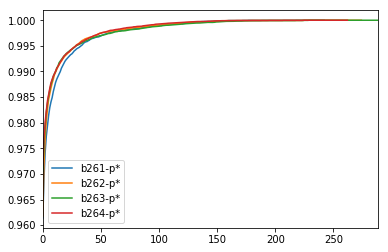

In [50]:
e = plt.subplot()
for r in result:
    ss = SIZES[r.test_name]
    rs = r.test_size
    ps = prec_star(r.y_test, r.probabilities[:,1], ss, rs)
    df = pd.DataFrame({"{}-p*".format(r.test_name): ps, })
    print r.prec_rec_curve[0]
    df.plot(ax = e)


    